# **Data Preparation**

> **What is data preparation process?**

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.

## **📤 Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 💾 Read Data

In [ ]:
ls

In [2]:
# read the lab06 dataset
COVID_DF = pd.read_csv("Detection of COVID-19 Infection from Routine Blood Exams.csv")
COVID_DF

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,F,40,5.6,270.0,NaN,NaN,NaN,NaN,NaN,16.7,22.0,29.0,78.0,20.0,NaN,0
275,M,26,4.7,44.0,NaN,NaN,NaN,NaN,NaN,47.5,30.0,44.0,110.0,93.0,175.0,0
276,F,44,15.7,356.0,NaN,NaN,NaN,NaN,NaN,2.4,31.0,17.0,NaN,NaN,272.0,0
277,F,41,12.0,321.0,6.7,2.3,1.6,1.3,0.1,41.2,16.0,11.0,201.0,14.0,266.0,0


# 🔎 Check the basic information of the dataset

In [3]:
# Checking dataset information
COVID_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SESSO       279 non-null    object 
 1   AGE         279 non-null    int64  
 2   WBC         277 non-null    float64
 3   Piastrine   277 non-null    float64
 4   Neutrofili  209 non-null    float64
 5   Linfociti   209 non-null    object 
 6   Monociti    209 non-null    float64
 7   Eosinofili  209 non-null    float64
 8   Basofili    208 non-null    float64
 9   PCR         273 non-null    float64
 10  AST         277 non-null    float64
 11  ALT         266 non-null    float64
 12  ALP         131 non-null    float64
 13  GGT         136 non-null    float64
 14  LDH         194 non-null    float64
 15  TARGET      279 non-null    int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 35.0+ KB


In [4]:
# Checking dataset information
COVID_DF.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


# **1. Dealing with Outliers**

**Definition:**

**In Statistics, an outlier is a data point that differs significantly from other observations (Grubbs, 1969; Maddala, 1992).**

**An outlier may be due to variability in the measurement or it may indicate experimental error, the latter are sometimes excluded from the data set (Grubbs, 1969).**

**Anoutlier can couse serious problem in statistical analysis.**

* [Wikipedia Article](http://en.wikipedia.org/wiki/Outlier)


In [5]:
#calculate dataset corrolation
COVID_DF.corr()

,AGE,WBC,Piastrine,Neutrofili,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
AGE,1.000000,0.102588,-0.169922,0.120493,0.033564,-0.111213,-0.074366,0.112145,-0.000950,-0.072027,0.005807,-0.024308,0.233535,0.096823
WBC,0.102588,1.000000,0.410903,0.949853,0.571743,0.170262,0.501879,0.257293,0.166680,0.070221,0.133253,0.087659,0.359851,-0.032397
Piastrine,-0.169922,0.410903,1.000000,0.303087,0.300559,0.237937,0.317986,0.083421,0.030870,0.145952,0.185051,0.236455,0.132384,0.030131
Neutrofili,0.120493,0.949853,0.303087,1.000000,0.434948,0.060161,0.433769,0.352394,0.241553,0.124421,0.062913,0.091343,0.366790,0.019409
Monociti,0.033564,0.571743,0.300559,0.434948,1.000000,0.230279,0.367889,-0.066332,-0.074981,-0.017995,0.022926,-0.078333,-0.170563,-0.193461
Eosinofili,-0.111213,0.170262,0.237937,0.060161,0.230279,1.000000,0.424574,-0.038679,0.038946,0.022065,0.169621,0.022376,-0.118227,-0.098190
Basofili,-0.074366,0.501879,0.317986,0.433769,0.367889,0.424574,1.000000,0.014646,0.197643,0.168447,0.031252,0.062178,0.013464,0.057408
PCR,0.112145,0.257293,0.083421,0.352394,-0.066332,-0.038679,0.014646,1.000000,0.288562,0.081042,-0.005511,0.093661,0.478846,0.302248
AST,-0.000950,0.166680,0.030870,0.241553,-0.074981,0.038946,0.197643,0.288562,1.000000,0.744532,0.363069,0.659550,0.585055,0.248244
ALT,-0.072027,0.070221,0.145952,0.124421,-0.017995,0.022065,0.168447,0.081042,0.744532,1.000000,0.294873,0.546285,0.284279,0.223103


In [6]:
#slice "TARGET" column corrolation and sort it
COVID_DF.corr()["TARGET"].sort_values()

Monociti     -0.193461
Eosinofili   -0.098190
ALP          -0.095880
WBC          -0.032397
GGT          -0.013642
Neutrofili    0.019409
Piastrine     0.030131
Basofili      0.057408
AGE           0.096823
ALT           0.223103
AST           0.248244
PCR           0.302248
LDH           0.432503
TARGET        1.000000
Name: TARGET, dtype: float64

### 🟣 **Remove the outliers**

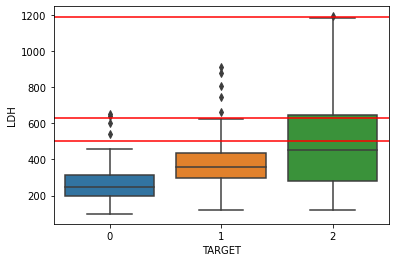

In [7]:
#plotting boxplot and Horizontal lines under the Outliers
sns.boxplot(data = COVID_DF, x = "TARGET", y="LDH")
plt.axhline(y = 500, color="r")
plt.axhline(y = 630, color="r")
plt.axhline(y = 1190, color="r")

In [8]:
#determine outliers by conditions
COVID_DF[(((COVID_DF["TARGET"]==0) & (COVID_DF["LDH"]>500)) | 
         ((COVID_DF["TARGET"]==1) & (COVID_DF["LDH"]>630)) |
         ((COVID_DF["TARGET"]==2) & (COVID_DF["LDH"]>1190)))][["TARGET", "LDH"]]

,TARGET,LDH
28,2,1195.0
84,1,913.0
119,1,748.0
140,1,878.0
143,1,808.0
164,1,661.0
187,0,643.0
212,0,601.0
218,0,541.0
258,0,652.0


In [9]:
#indicating the outliers indexes by conditions
LDH_index_drop = COVID_DF[(((COVID_DF["TARGET"]==0) & (COVID_DF["LDH"]>500)) | 
         ((COVID_DF["TARGET"]==1) & (COVID_DF["LDH"]>630)) |
         ((COVID_DF["TARGET"]==2) & (COVID_DF["LDH"]>1190)))].index

#Remove the outliers by indexes
COVID_DF = COVID_DF.drop(LDH_index_drop, axis=0)

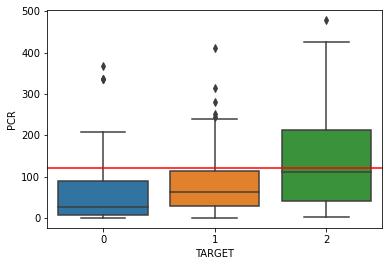

In [10]:
#plotting boxplot and Horizontal line under the Outliers
sns.boxplot(data = COVID_DF, x = "TARGET", y="PCR")
plt.axhline(y = 120, color="r")

In [11]:
#determine outliers by conditions
COVID_DF[(((COVID_DF["TARGET"]==0) & (COVID_DF["PCR"]>120)))][["TARGET", "PCR"]]

,TARGET,PCR
181,0,184.1
197,0,157.9
200,0,335.0
204,0,335.3
207,0,145.1
209,0,156.7
215,0,132.4
216,0,129.1
220,0,366.2
232,0,190.2


In [12]:
#indicating the outliers indexes by conditions
PCR_index_drop = COVID_DF[(((COVID_DF["TARGET"]==0) & (COVID_DF["PCR"]>120)))].index

#Remove the outliers by indexes
COVID_DF = COVID_DF.drop(PCR_index_drop, axis=0)

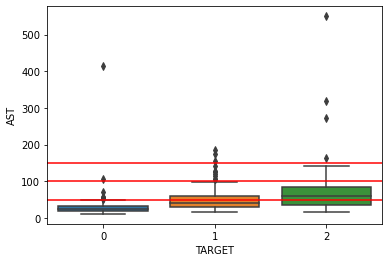

In [13]:
#plotting boxplot and Horizontal lines under the Outliers
sns.boxplot(data = COVID_DF, x = "TARGET", y="AST")
plt.axhline(y = 50, color="r")
plt.axhline(y = 100, color="r")
plt.axhline(y = 150, color="r")

In [14]:
#determine outliers by conditions
COVID_DF[(((COVID_DF["TARGET"]==0) & (COVID_DF["AST"]>50)) | 
         ((COVID_DF["TARGET"]==1) & (COVID_DF["AST"]>100)) |
         ((COVID_DF["TARGET"]==2) & (COVID_DF["AST"]>150)))][["TARGET", "AST"]]

,TARGET,AST
15,2,320.0
16,2,163.0
60,2,550.0
70,2,273.0
75,1,175.0
80,1,126.0
86,1,114.0
91,1,105.0
92,1,185.0
95,1,141.0


In [15]:
#indicating the outliers indexes by conditions
AST_index_drop = COVID_DF[(((COVID_DF["TARGET"]==0) & (COVID_DF["AST"]>50)) | 
         ((COVID_DF["TARGET"]==1) & (COVID_DF["AST"]>100)) |
         ((COVID_DF["TARGET"]==2) & (COVID_DF["AST"]>150)))].index

#Remove the outliers by indexes
COVID_DF = COVID_DF.drop(AST_index_drop, axis=0)

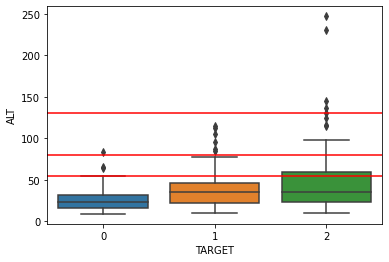

In [16]:
#plotting boxplot and Horizontal lines under the Outliers
sns.boxplot(data = COVID_DF, x = "TARGET", y="ALT")
plt.axhline(y = 55, color="r")
plt.axhline(y = 80, color="r")
plt.axhline(y = 130, color="r")

In [17]:
#determine outliers by conditions
COVID_DF[(((COVID_DF["TARGET"]==0) & (COVID_DF["ALT"]>55)) | 
         ((COVID_DF["TARGET"]==1) & (COVID_DF["ALT"]>80)) |
         ((COVID_DF["TARGET"]==2) & (COVID_DF["ALT"]>130)))][["TARGET", "ALT"]]

,TARGET,ALT
7,2,131.0
29,2,145.0
56,2,231.0
57,2,247.0
64,2,137.0
73,1,115.0
99,1,112.0
114,1,87.0
144,1,85.0
147,1,96.0


In [18]:
#indicating the outliers indexes by conditions
ALT_index_drop = COVID_DF[(((COVID_DF["TARGET"]==0) & (COVID_DF["ALT"]>55)) | 
         ((COVID_DF["TARGET"]==1) & (COVID_DF["ALT"]>80)) |
         ((COVID_DF["TARGET"]==2) & (COVID_DF["ALT"]>130)))].index

#Remove the outliers by indexes
COVID_DF = COVID_DF.drop(ALT_index_drop, axis=0)

# **2. Dealing with Missing Data**

**In statistics, missing data, or missing values, occur when no data value is stored for the variable in an observation. missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.**

[Wikipedia Article](http://en.wikipedia.org/wiki/Missing_data)


### 🟣 **Fill/Keep/Drop?**

## **A. How Much Data is Missing?**

In [19]:
# Chekink fr missing data in dataset and arange them 
COVID_DF.isnull().sum().sort_values()

SESSO           0
AGE             0
TARGET          0
WBC             2
Piastrine       2
AST             2
PCR             6
ALT            10
Eosinofili     55
Neutrofili     56
Linfociti      56
Monociti       56
Basofili       56
LDH            67
GGT           111
ALP           114
dtype: int64

### **🟣 Make a Function to calculate the percent of missing data in each columns (feature) and then sort it**

In [20]:
#define a function for findig missing and calculat the percentage of missing datas
def percentage_of_Nan (DF) :
    return((100*(DF.isnull().sum())/len(DF)).sort_values())

In [21]:
#define a new dataset for percentage of missing data
NaN_percent = percentage_of_Nan(COVID_DF)
NaN_percent

SESSO          0.000000
AGE            0.000000
TARGET         0.000000
WBC            0.930233
Piastrine      0.930233
AST            0.930233
PCR            2.790698
ALT            4.651163
Eosinofili    25.581395
Neutrofili    26.046512
Linfociti     26.046512
Monociti      26.046512
Basofili      26.046512
LDH           31.162791
GGT           51.627907
ALP           53.023256
dtype: float64

### **🟣 Plot the feature with missing indicating the percent of missing data:**

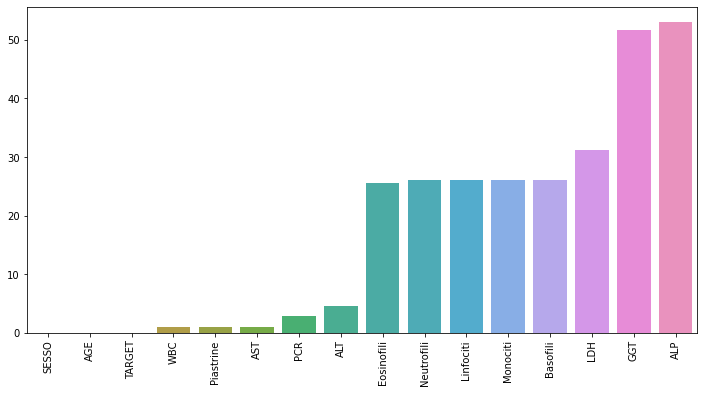

In [22]:
#plot the missing data percent
plt.figure(figsize = (12,6))
sns.barplot(x=NaN_percent.index, y=NaN_percent)
plt.xticks(rotation = 90)
plt.show()

### **B. Working base on Rows Missing Data**

**If only a few rows are missing some values, then it might just be a good idea to drop those rows.** 

**What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.**


**Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category.** 

(Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!)

**every Feature with missing data must be checked!**

**We choose a threshold of 1%. It means, if there is less than 1% of a feature are missing,then we will consider just dropping that rows**

### **🟣 Dropping Rows:**

In [23]:
#cheking missing data in "WBC" column
COVID_DF[COVID_DF["WBC"].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
40,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
69,M,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8,27.0,39.0,NaN,NaN,321.0,2


In [24]:
#cheking missing data in "Piastrine" column
COVID_DF[COVID_DF["Piastrine"].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
40,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
69,M,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.8,27.0,39.0,NaN,NaN,321.0,2


In [25]:
#cheking missing data in "AST" column
COVID_DF[COVID_DF["AST"].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
40,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [26]:
#cheking missing data in "PCR" column
COVID_DF[COVID_DF["PCR"].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,M,77,3.0,162.0,2.0,0.4,0.4,0.1,NaN,NaN,21.0,10.0,NaN,NaN,220.0,2
11,M,84,7.8,167.0,6.2,0.9,0.7,0.0,0.0,NaN,33.0,29.0,NaN,NaN,NaN,2
19,M,85,5.7,205.0,3.9,1.3,0.5,0.0,0.0,NaN,87.0,31.0,87.0,26.0,494.0,2
40,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
255,M,80,10.1,325.0,7.6,1.7,0.6,0.2,0.0,NaN,19.0,23.0,NaN,NaN,NaN,0


In [27]:
#cheking missing data in "ALT" column
COVID_DF[COVID_DF["ALT"].isnull()]

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,M,75,7.2,26.0,6.2,0.6,0.3,0.1,0.0,248.2,85.0,NaN,130.0,NaN,453.0,2
17,M,41,11.3,384.0,8.1,2.3,0.7,0.1,0.1,27.0,65.0,NaN,145.0,NaN,282.0,2
30,M,70,10.5,119.0,9.0,0.8,0.7,0.0,0.0,182.3,93.0,NaN,56.0,147.0,697.0,2
40,M,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
43,M,68,11.2,308.0,9.6,0.9,0.6,0.1,0.0,170.4,78.0,NaN,75.0,NaN,NaN,2
62,F,70,20.0,332.0,17.6,0.9,1.2,0.2,0.3,25.6,41.0,NaN,100.0,NaN,539.0,2
63,F,70,12.0,308.0,10.7,0.8,0.5,0.0,0.0,187.6,86.0,NaN,106.0,87.0,NaN,2
68,M,37,8.9,387.0,6.7,1.2,0.4,0.5,0.1,162.4,59.0,NaN,55.0,NaN,562.0,2
74,F,29,6.6,297.0,5.0,1.1,0.5,0.0,0.0,43.3,29.0,NaN,NaN,13.0,548.0,1


In [28]:
#dropping rows 
COVID_DF=COVID_DF.dropna(axis = 0, subset = ["WBC", "Piastrine", "AST", "PCR", "ALT"])

In [30]:
#checking again for missing percent
NaN_percent = percentage_of_Nan(COVID_DF)
NaN_percent

SESSO          0.0
AGE            0.0
WBC            0.0
Piastrine      0.0
PCR            0.0
AST            0.0
ALT            0.0
TARGET         0.0
Eosinofili    26.0
Basofili      26.0
Neutrofili    26.5
Linfociti     26.5
Monociti      26.5
LDH           30.5
GGT           50.0
ALP           53.5
dtype: float64

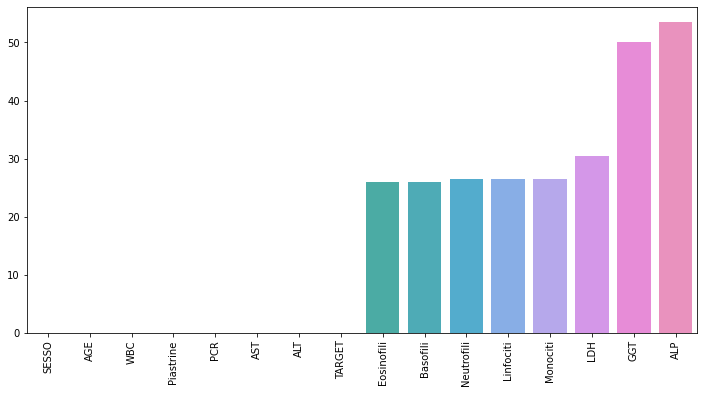

In [31]:
#plotting again for missing percent
plt.figure(figsize = (12,6))
sns.barplot(x=NaN_percent.index, y=NaN_percent)
plt.xticks(rotation = 90)
plt.show()

## **C. Working based on Columns Missing Data**

### **🟣 Filling the missing values:**

In [32]:
# fill the missing of numerical columns by an intiger
num_cols = ["Neutrofili", "Monociti", "Eosinofili", "Basofili"]
COVID_DF[num_cols] = COVID_DF[num_cols].fillna(0)

In [33]:
## fill the missing of numerical column by the column mean
COVID_DF["GGT"] = COVID_DF["GGT"].fillna(COVID_DF["GGT"].mean())

In [34]:
## fill the missing of numerical column by the column mean
COVID_DF["LDH"] = COVID_DF["LDH"].fillna(COVID_DF["LDH"].mean())

In [35]:
#checking again for missing percent
NaN_percent = percentage_of_Nan(COVID_DF)
NaN_percent

SESSO          0.0
AGE            0.0
WBC            0.0
Piastrine      0.0
Neutrofili     0.0
Monociti       0.0
Eosinofili     0.0
Basofili       0.0
PCR            0.0
AST            0.0
ALT            0.0
GGT            0.0
LDH            0.0
TARGET         0.0
Linfociti     26.5
ALP           53.5
dtype: float64

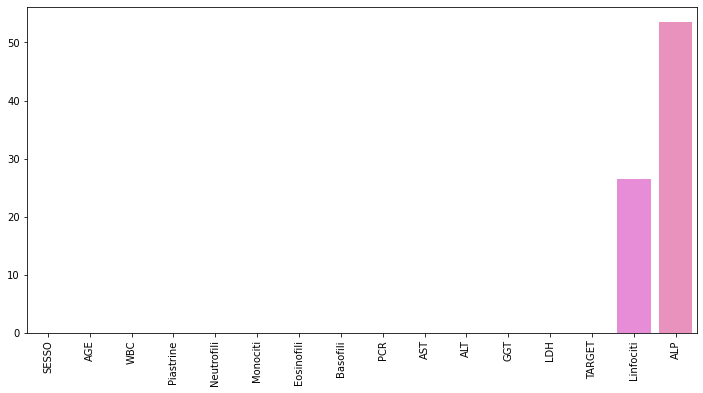

In [36]:
#plotting again for missing percent
plt.figure(figsize = (12,6))
sns.barplot(x=NaN_percent.index, y=NaN_percent)
plt.xticks(rotation = 90)
plt.show()

### **🟣 Remove the Columns with more than 80% missing values**

## چینین ستونی وجود ندارد ولی برای نشان دادن نحوه اجرا کد بر روی بیشترین درصد اعمال میکنم یعنی بیشتر از 50 

In [37]:
#Remove the Columns with more than 50% missing values
COVID_DF = COVID_DF.drop(["ALP"], axis = 1)

In [38]:
#checking again for missing percent
NaN_percent = percentage_of_Nan(COVID_DF)
NaN_percent

SESSO          0.0
AGE            0.0
WBC            0.0
Piastrine      0.0
Neutrofili     0.0
Monociti       0.0
Eosinofili     0.0
Basofili       0.0
PCR            0.0
AST            0.0
ALT            0.0
GGT            0.0
LDH            0.0
TARGET         0.0
Linfociti     26.5
dtype: float64

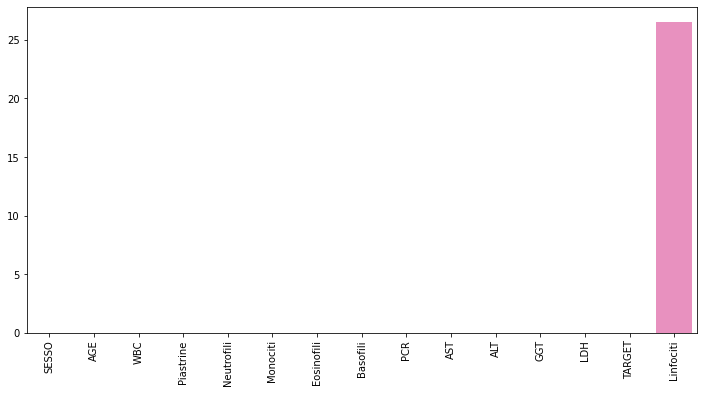

In [39]:
#plotting again for missing percent
plt.figure(figsize = (12,6))
sns.barplot(x=NaN_percent.index, y=NaN_percent)
plt.xticks(rotation = 90)
plt.show()

## **D. Imputation of Missing Data**

In [40]:
#impute the missig data by using lambda and a str value
COVID_DF["Linfociti"] = COVID_DF["Linfociti"].transform(lambda val: val.fillna("none"))

# **Now, we don't have any Missing Data**

In [41]:
#checking again for missing percent
NaN_percent = percentage_of_Nan(COVID_DF)
NaN_percent

SESSO         0.0
AGE           0.0
WBC           0.0
Piastrine     0.0
Neutrofili    0.0
Linfociti     0.0
Monociti      0.0
Eosinofili    0.0
Basofili      0.0
PCR           0.0
AST           0.0
ALT           0.0
GGT           0.0
LDH           0.0
TARGET        0.0
dtype: float64

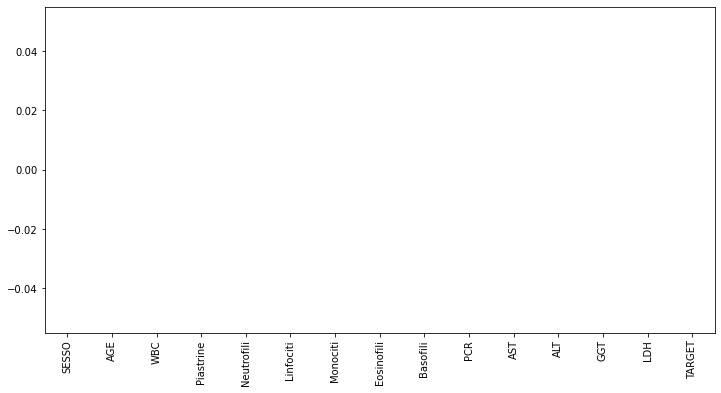

In [42]:
#plotting again for missing percent
plt.figure(figsize = (12,6))
sns.barplot(x=NaN_percent.index, y=NaN_percent)
plt.xticks(rotation = 90)
plt.show()